In [20]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

Preprocessing of Data

In [21]:


#  Load Dataset
df = pd.read_csv(r"C:\Users\chaha\Downloads\archive (2)\spam.csv", encoding='latin-1')

# Keep only required columns and rename
df = df[['v1', 'v2']]  
df = df.rename(columns={'v1': 'category', 'v2': 'Message'})

#  Preview Data
print("First 5 rows of the dataset:")
print(df.head())

# Label Encoding
df.loc[df['category'] == 'spam', 'category'] = 0
df.loc[df['category'] == 'ham', 'category'] = 1

# Features and Labels
X = df['Message']
Y = df['category'].astype(int)  # convert to integers

First 5 rows of the dataset:
  category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...


Graphs for better understanding 


 Class Distribution:
category
1    4825
0     747
Name: count, dtype: int64


C:\Users\chaha\AppData\Local\Temp\ipykernel_16888\405038994.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='category', data=df, palette='Set3')


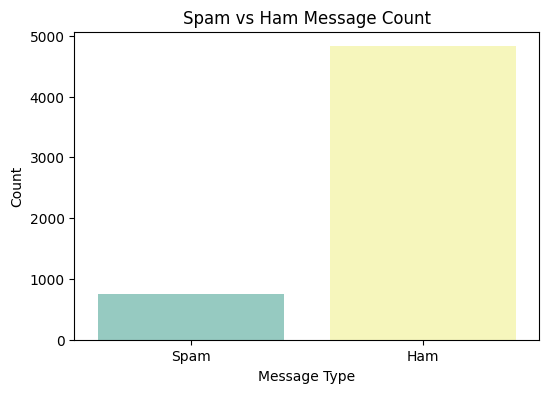

In [22]:
# Class Balance
print("\n Class Distribution:")
print(df['category'].value_counts())

# Barplot: Spam vs Ham
plt.figure(figsize=(6, 4))
sns.countplot(x='category', data=df, palette='Set3')
plt.title("Spam vs Ham Message Count")
plt.xticks(ticks=[0, 1], labels=["Spam", "Ham"])
plt.xlabel("Message Type")
plt.ylabel("Count")
plt.show()

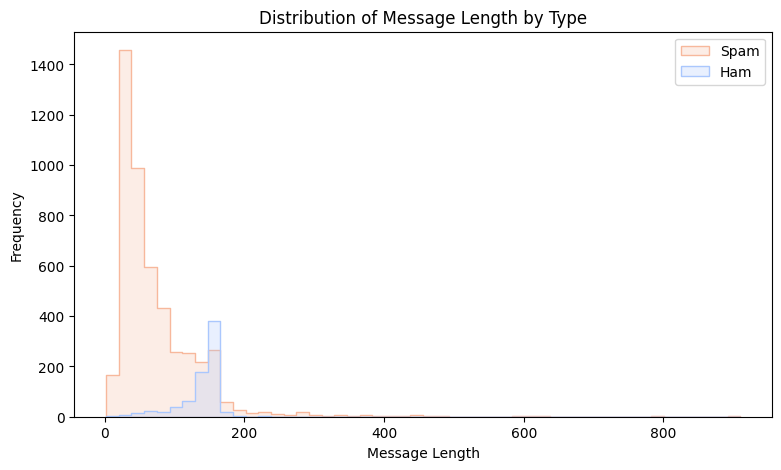

In [23]:

#  Add a new column for message length
df['message_length'] = df['Message'].apply(len)

#  Histogram: Message Length Distribution
plt.figure(figsize=(9, 5))
sns.histplot(data=df, x='message_length', hue='category', bins=50, palette='coolwarm', element='step')
plt.title("Distribution of Message Length by Type")
plt.xlabel("Message Length")
plt.ylabel("Frequency")
plt.legend(labels=["Spam", "Ham"])
plt.show()


Training of Model 

In [24]:

# Train-Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

# TF-IDF Vectorization 
vectorizer = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)
X_train_features = vectorizer.fit_transform(X_train)
X_test_features = vectorizer.transform(X_test)

#  Model Training
model = LogisticRegression()
model.fit(X_train_features, Y_train)




LogisticRegression()

Result 

In [25]:
# Evaluation
y_pred = model.predict(X_test_features)
print(" Accuracy on Training:", accuracy_score(Y_train, model.predict(X_train_features)))
print(" Accuracy on Test:", accuracy_score(Y_test, y_pred))

print("\nConfusion Matrix:\n", confusion_matrix(Y_test, y_pred))
print("\nClassification Report:\n", classification_report(Y_test, y_pred))

# Test with Input
input_mail = ["Congratulations! You have won a $1000  Walmart gift card. Go to bit.ly/xyz to claim now."]
input_features = vectorizer.transform(input_mail)
prediction = model.predict(input_features)

print("\nPrediction:", "Ham Mail" if prediction[0] == 1 else "Spam Mail")

 Accuracy on Training: 0.9661207089970832
 Accuracy on Test: 0.9623318385650225

Confusion Matrix:
 [[114  41]
 [  1 959]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.74      0.84       155
           1       0.96      1.00      0.98       960

    accuracy                           0.96      1115
   macro avg       0.98      0.87      0.91      1115
weighted avg       0.96      0.96      0.96      1115


Prediction: Ham Mail


For interface 

In [26]:
import gradio as gr

def predict_mail(text):
    input_features = vectorizer.transform([text])
    prediction = model.predict(input_features)[0]
    return "Ham Mail" if prediction == 1 else "Spam Mail"

interface = gr.Interface(fn=predict_mail, inputs="text", outputs="text", title="SMS Spam Classifier")
interface.launch()


* Running on local URL:  http://127.0.0.1:7861
* To create a public link, set `share=True` in `launch()`.
